In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
df = pd.read_csv("height-weight.csv")
df.head()

,Height(Inches),Weight(Pounds)
0,65.78331,112.9925
1,71.51521,136.4873
2,69.39874,153.0269
3,68.21660,142.3354
4,67.78781,144.2971


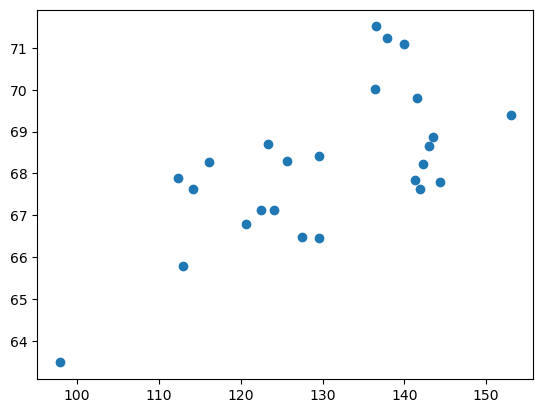

In [11]:
# scatterplot
plt.scatter(df["Weight(Pounds)"],df["Height(Inches)"])
plt.show()

In [13]:
# correlation

df.corr()

,Height(Inches),Weight(Pounds)
Height(Inches),1.000000,0.645509
Weight(Pounds),0.645509,1.000000


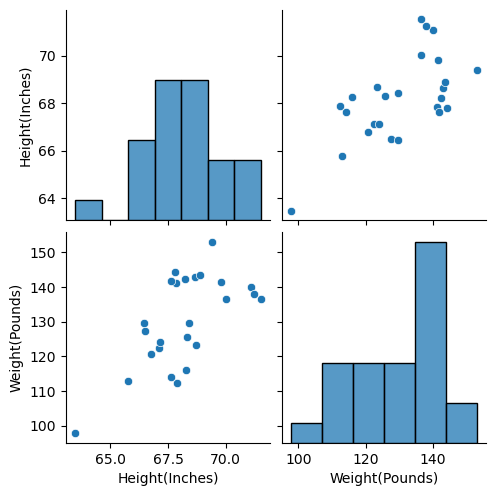

In [15]:
import seaborn as sns
sns.pairplot(df)
plt.show()

In [23]:
#independent and dependent features
X = df[["Weight(Pounds)"]]  # independent features should be in data frame or in 2d array
y = df["Height(Inches)"]    # this can be in series or 1d array


In [32]:
# train test split data

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 42)

In [34]:
# standardization 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [36]:
X_test, X_train

(array([[-1.14803596],
        [ 1.35326759],
        [-1.05747504],
        [ 1.353326  ],
        [-0.88948031],
        [ 0.06317611],
        [ 0.32522161]]),
 array([[ 0.17846477],
        [-2.86503341],
        [-0.86152003],
        [ 1.4830581 ],
        [-0.67944835],
        [ 0.45533867],
        [ 0.63974511],
        [ 0.79447803],
        [ 0.55655358],
        [ 0.69006072],
        [ 0.73469719],
        [ 0.29009144],
        [ 0.60146612],
        [ 0.17649285],
        [-0.53424376],
        [-1.43068038],
        [-0.80295389],
        [ 0.57343325]]))

In [48]:
# apply linear regression

from sklearn.linear_model import LinearRegression


regression = LinearRegression(n_jobs =-1)

In [50]:
regression.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [52]:
regression.coef_

array([1.1349078])

In [58]:
regression.intercept_

68.57927611111113

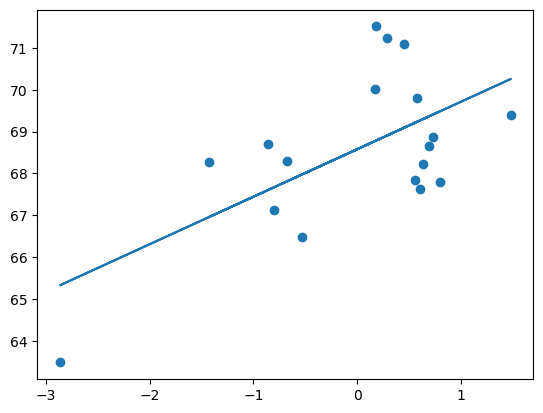

In [66]:
# plot best fit line for training data

plt.scatter(X_train, y_train)
plt.plot(X_train, regression.predict(X_train))
plt.show()

In [70]:
# prediction for test data

y_pred = regression.predict(X_test)

In [78]:
# performance metrics

from sklearn.metrics import mean_absolute_error, mean_squared_error

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

mse, rmse , mae

(3.715548840456729, 1.9275758974568886, 1.6176420764522845)

In [82]:
from sklearn.metrics import r2_score

score = r2_score(y_test, y_pred)
print(score)

-4.322291141481675
